In [2]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2019)

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

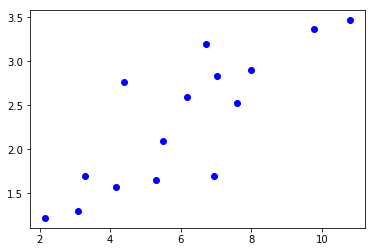

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train,y_train,'bo')

In [5]:
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)

w=Variable(torch.randn(1),requires_grad=True)
b=Variable(torch.zeros(1),requires_grad=True)

In [8]:
x_train=Variable(x_train)
y_train=Variable(y_train)

def linear_model(x):
    return x*w+b

In [12]:
y=linear_model(x_train)

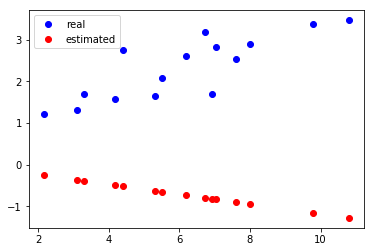

In [13]:
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real')
plt.plot(x_train.data.numpy(),y.data.numpy(),'ro',label='estimated')
plt.legend()

In [16]:
def get_loss(y,y_train):
    return torch.mean((y-y_train)**2)

loss=get_loss(y,y_train)

In [17]:
print(loss)

tensor(10.2335, grad_fn=<MeanBackward1>)


In [18]:
loss.backward()

In [20]:
print(w.grad)
print(b.grad)

tensor([-41.1289])
tensor([-6.0890])


In [21]:
w.data=w.data-1e-2*w.grad.data
b.data=b.data-1e-2*b.grad.data

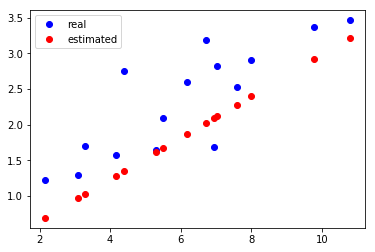

In [22]:
y=linear_model(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real')
plt.plot(x_train.data.numpy(),y.data.numpy(),'ro',label='estimated')
plt.legend()

In [24]:
for e in range(10):
    y=linear_model(x_train)
    loss=get_loss(y,y_train)
    
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    w.data=w.data-1e-2*w.grad.data
    b.data=b.data-1e-2*b.grad.data
    
    print('epoch:{},loss:{}'.format(e,loss.data))

epoch:0,loss:0.23218491673469543
epoch:1,loss:0.2285148650407791
epoch:2,loss:0.22814729809761047
epoch:3,loss:0.2278423011302948
epoch:4,loss:0.22753994166851044
epoch:5,loss:0.22723926603794098
epoch:6,loss:0.2269400656223297
epoch:7,loss:0.2266424000263214
epoch:8,loss:0.22634625434875488
epoch:9,loss:0.2260516732931137


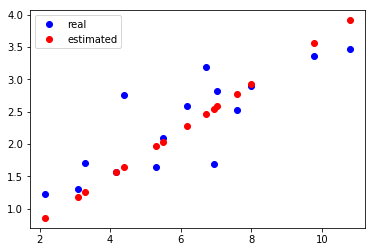

In [25]:
y=linear_model(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real')
plt.plot(x_train.data.numpy(),y.data.numpy(),'ro',label='estimated')
plt.legend()

多项式回归

In [27]:
w_target=np.array([0.5,3,2.4])
b_target=np.array([0.9])

fes='y = {:.2f}+{:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0],w_target[0],w_target[1],w_target[2])
print(fes)

y = 0.90+0.50 * x + 3.00 * x^2 + 2.40 * x^3


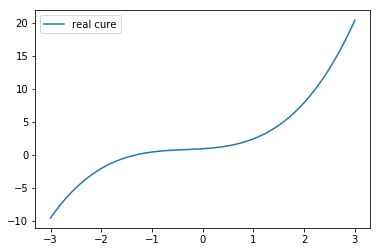

In [28]:
x_sample=np.arange(-3,3.1,0.1)
y_sample=b_target[0] + w_target[0]*x_sample+ w_target[0]*x_sample**2 + w_target[0]*x_sample**3

plt.plot(x_sample,y_sample,label='real cure')
plt.legend()

In [31]:
print(x_sample)
print(x_sample.shape)
print('-'*50)
print(y_sample)
print(y_sample.shape)

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00]
(61,)
-

In [36]:
# 沿着某一列插入新的一列数据
x_train=np.stack([x_sample ** i for i in range(1,4)],axis=1)
print(x_train.shape)
print(x_train)
x_train=torch.from_numpy(x_train).float()

(61, 3)
[[-3.00000000e+00  9.00000000e+00 -2.70000000e+01]
 [-2.90000000e+00  8.41000000e+00 -2.43890000e+01]
 [-2.80000000e+00  7.84000000e+00 -2.19520000e+01]
 [-2.70000000e+00  7.29000000e+00 -1.96830000e+01]
 [-2.60000000e+00  6.76000000e+00 -1.75760000e+01]
 [-2.50000000e+00  6.25000000e+00 -1.56250000e+01]
 [-2.40000000e+00  5.76000000e+00 -1.38240000e+01]
 [-2.30000000e+00  5.29000000e+00 -1.21670000e+01]
 [-2.20000000e+00  4.84000000e+00 -1.06480000e+01]
 [-2.10000000e+00  4.41000000e+00 -9.26100000e+00]
 [-2.00000000e+00  4.00000000e+00 -8.00000000e+00]
 [-1.90000000e+00  3.61000000e+00 -6.85900000e+00]
 [-1.80000000e+00  3.24000000e+00 -5.83200000e+00]
 [-1.70000000e+00  2.89000000e+00 -4.91300000e+00]
 [-1.60000000e+00  2.56000000e+00 -4.09600000e+00]
 [-1.50000000e+00  2.25000000e+00 -3.37500000e+00]
 [-1.40000000e+00  1.96000000e+00 -2.74400000e+00]
 [-1.30000000e+00  1.69000000e+00 -2.19700000e+00]
 [-1.20000000e+00  1.44000000e+00 -1.72800000e+00]
 [-1.10000000e+00  1.21

In [37]:
y_train=torch.from_numpy(y_sample).float().unsqueeze(1)
print(y_train.shape)

torch.Size([61, 1])


In [38]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

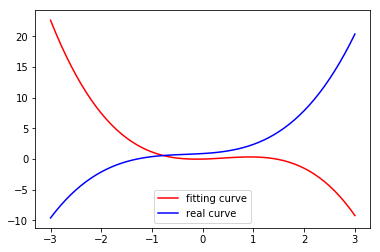

In [39]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [40]:
# 计算误差，这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss
loss = get_loss(y_pred, y_train)
print(loss)

tensor(154.2059, grad_fn=<MeanBackward1>)


In [41]:
# 自动求导
loss.backward()

In [42]:

# 查看一下 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([[ -40.3025],
        [   2.9368],
        [-265.6321]])
tensor([-0.2731])


In [43]:
# 更新一下参数
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

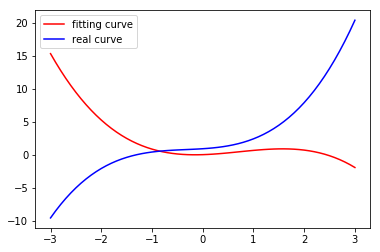

In [44]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [46]:
# 进行 100 次参数更新
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data))

epoch 20, Loss: 0.35950
epoch 40, Loss: 0.34281
epoch 60, Loss: 0.33013
epoch 80, Loss: 0.31869
epoch 100, Loss: 0.30783


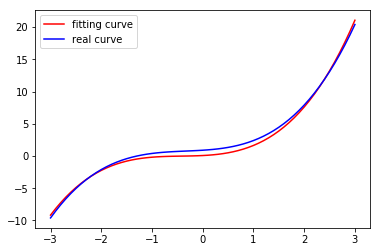

In [47]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()